<a href="https://colab.research.google.com/github/Natalkina/DataScience/blob/main/%22HW10_convolution_mnist_part1_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
test_images.shape

(10000, 28, 28)

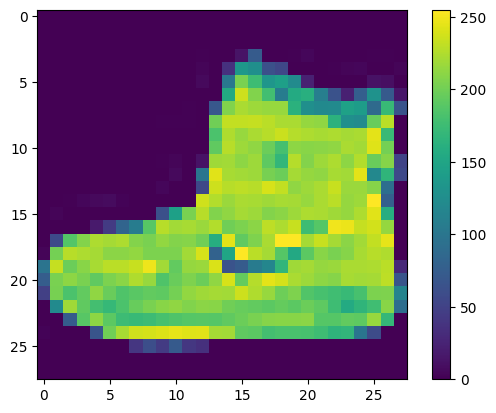

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
#normalize data
train_images = train_images / 255.0

test_images = test_images / 255.0

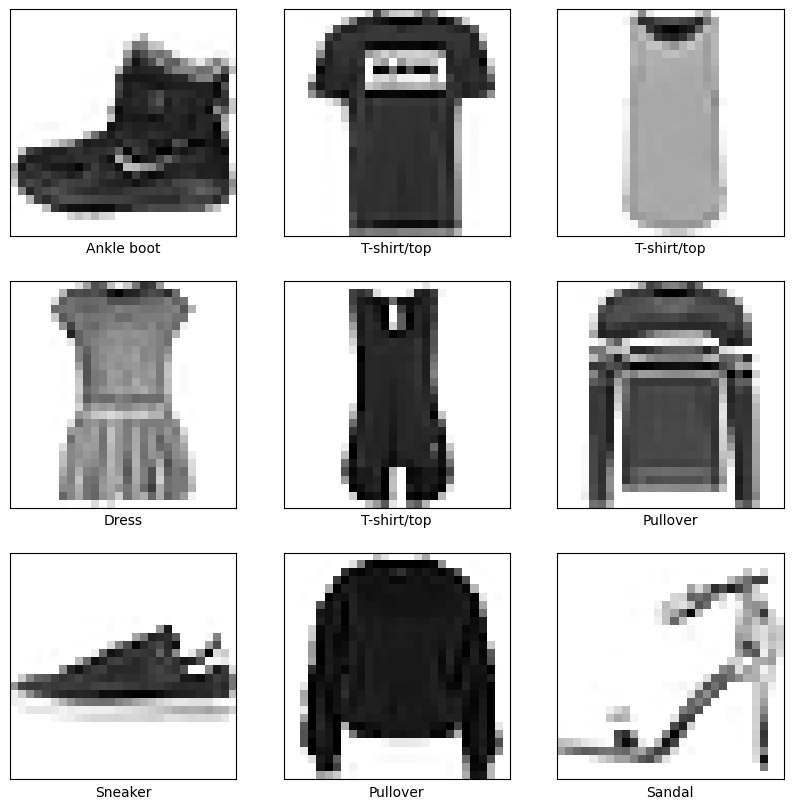

In [7]:
# lets see the data
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [27]:
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='linear'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [28]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [29]:
# Using the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels),  verbose=2)

Epoch 1/10
1875/1875 - 38s - loss: 0.5911 - accuracy: 0.7826 - val_loss: 0.4452 - val_accuracy: 0.8425 - 38s/epoch - 20ms/step
Epoch 2/10
1875/1875 - 36s - loss: 0.3990 - accuracy: 0.8562 - val_loss: 0.4535 - val_accuracy: 0.8376 - 36s/epoch - 19ms/step
Epoch 3/10
1875/1875 - 37s - loss: 0.3469 - accuracy: 0.8724 - val_loss: 0.3943 - val_accuracy: 0.8595 - 37s/epoch - 20ms/step
Epoch 4/10
1875/1875 - 36s - loss: 0.3210 - accuracy: 0.8824 - val_loss: 0.3512 - val_accuracy: 0.8703 - 36s/epoch - 19ms/step
Epoch 5/10
1875/1875 - 35s - loss: 0.2989 - accuracy: 0.8897 - val_loss: 0.3365 - val_accuracy: 0.8755 - 35s/epoch - 19ms/step
Epoch 6/10
1875/1875 - 37s - loss: 0.2809 - accuracy: 0.8946 - val_loss: 0.3339 - val_accuracy: 0.8815 - 37s/epoch - 20ms/step
Epoch 7/10
1875/1875 - 36s - loss: 0.2674 - accuracy: 0.9015 - val_loss: 0.3361 - val_accuracy: 0.8785 - 36s/epoch - 19ms/step
Epoch 8/10
1875/1875 - 36s - loss: 0.2539 - accuracy: 0.9057 - val_loss: 0.3349 - val_accuracy: 0.8776 - 36s/ep

In [30]:
# Testing accuracy evaluation
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_accuracy}")

predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

correct_predictions = np.equal(predicted_labels, test_labels)
accuracy = np.mean(correct_predictions)
print(f"Accuracy on test images: {accuracy:.2f}")

313/313 - 2s - loss: 0.3714 - accuracy: 0.8736 - 2s/epoch - 6ms/step
Test accuracy: 0.8736000061035156
313/313 [==============================] - 3s 10ms/step
Accuracy on test images: 0.87


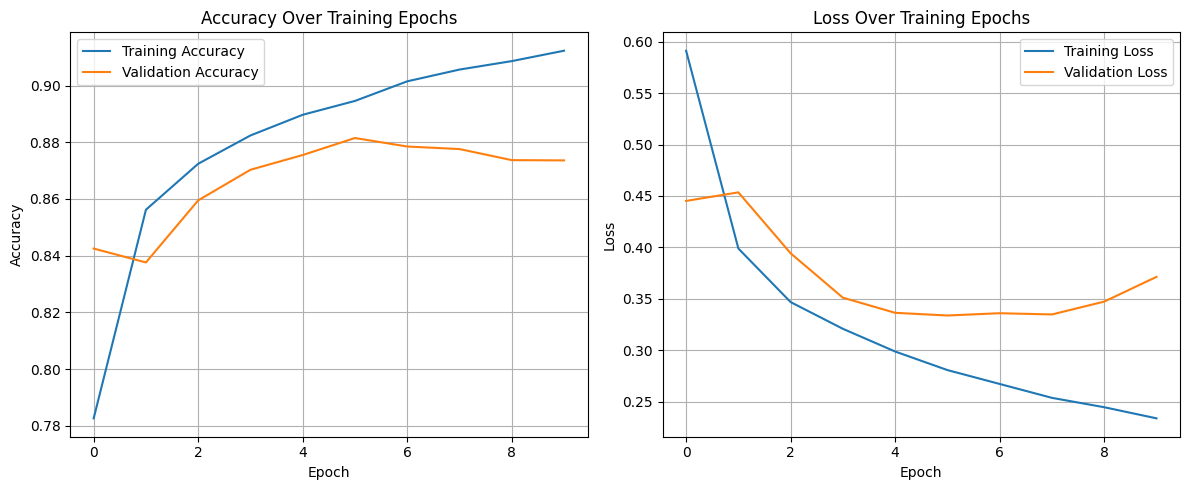

In [31]:
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Training Epochs')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Training Epochs')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [32]:
from sklearn.metrics import classification_report

test_predictions = model.predict(test_images)
predicted_classes = np.argmax(test_predictions, axis=1)

report = classification_report(test_labels, predicted_classes, target_names=class_names)
print(report)

313/313 [==============================] - 2s 6ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.81      0.87      0.84      1000
     Trouser       1.00      0.96      0.98      1000
    Pullover       0.85      0.75      0.80      1000
       Dress       0.88      0.90      0.89      1000
        Coat       0.74      0.85      0.79      1000
      Sandal       0.96      0.98      0.97      1000
       Shirt       0.68      0.64      0.66      1000
     Sneaker       0.87      0.98      0.92      1000
         Bag       0.99      0.96      0.97      1000
  Ankle boot       0.99      0.85      0.92      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



Таким чином використання згоркових моделей,  дозволяє досягти заданих результатів точності при меншій кількості епох, та більшох точності при однаковій кількості.